## import basic packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")

# Understanding the dataset

## read the dataset

In [2]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

## Features

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type

> Value 1: typical angina 

> Value 2: atypical angina

> Value 3: non-anginal pain

> Value 4: asymptomatic

> trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

>Value 0: normal

>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
print("number of missing values per feature",df.isnull().sum())

number of missing values per feature age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
#Check if there is a duplicate row 
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  1


In [5]:
#remove duplicates 
df=df.drop_duplicates(keep="first")

In [6]:
print("length of the dataset : ", df.shape[0])
print("number of features : ", df.shape[1])

length of the dataset :  302
number of features :  14


In [7]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [8]:
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", categorial_features)
print("The continuous cols are : ", continuous_features)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
#get the data distribution of the categorical features 
df[continuous_features].describe().transpose()

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2

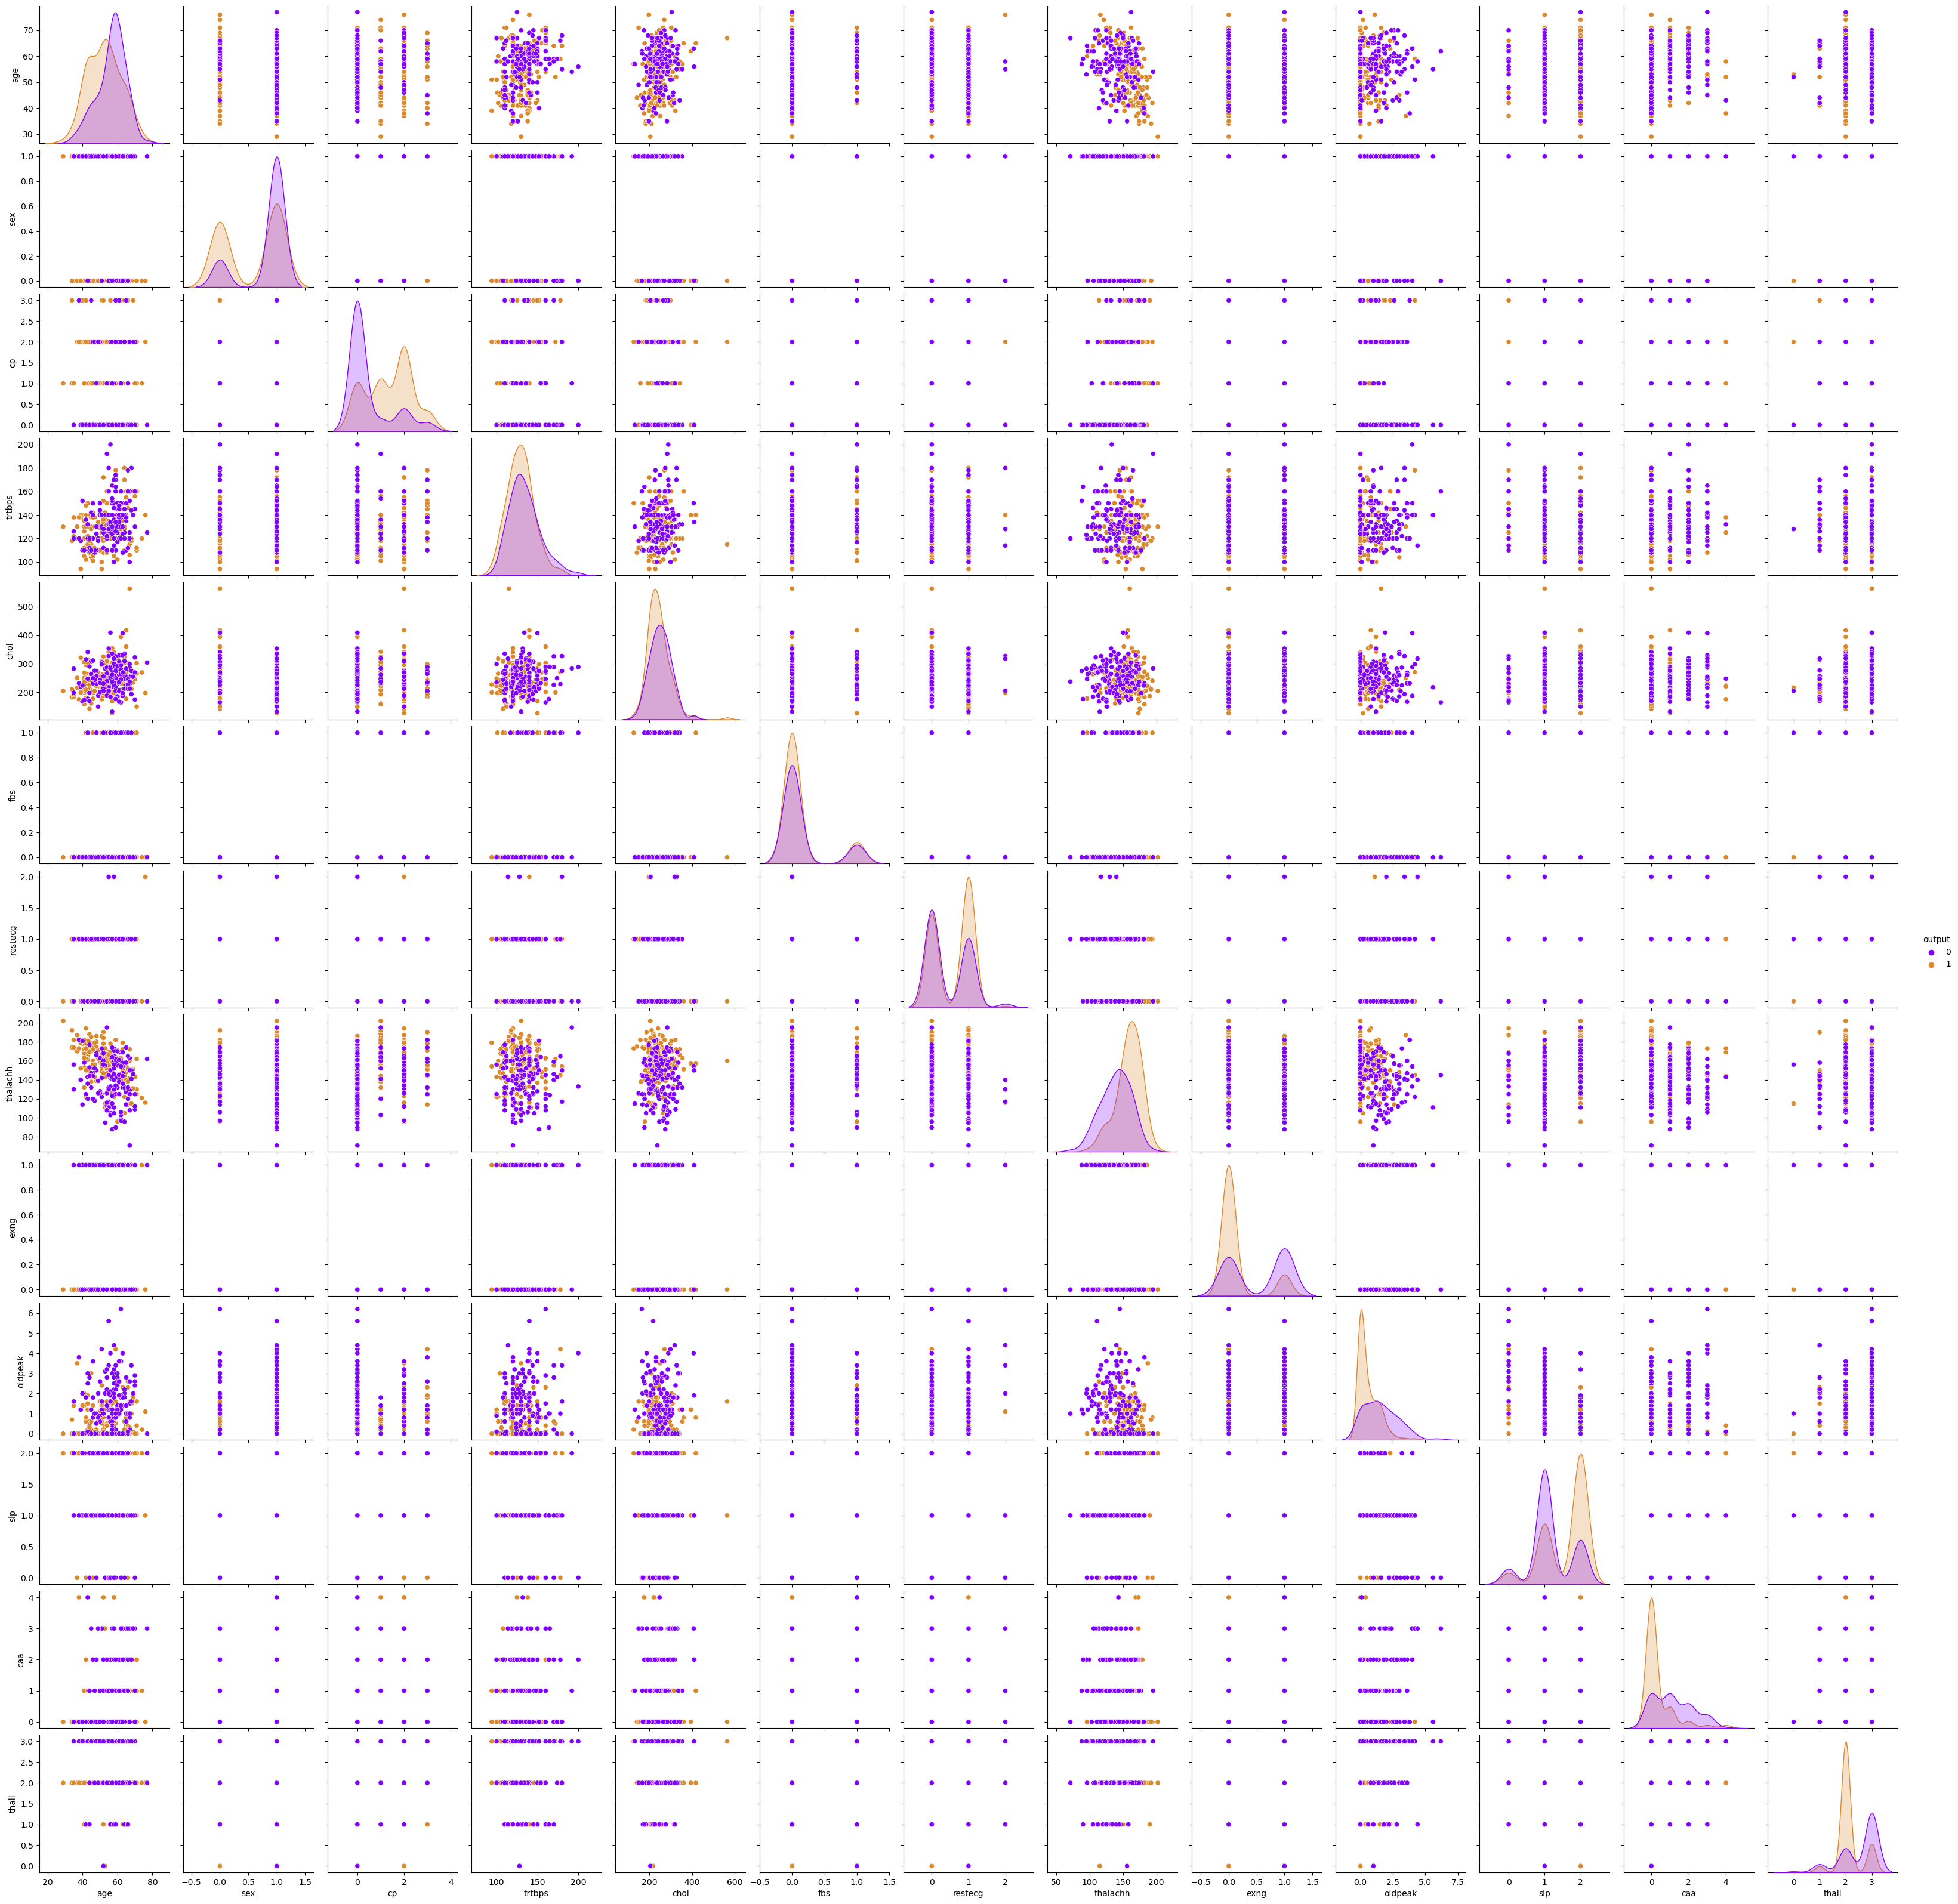

In [10]:
sns.pairplot(df,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

In [11]:
df_corr = df.corr().transpose()

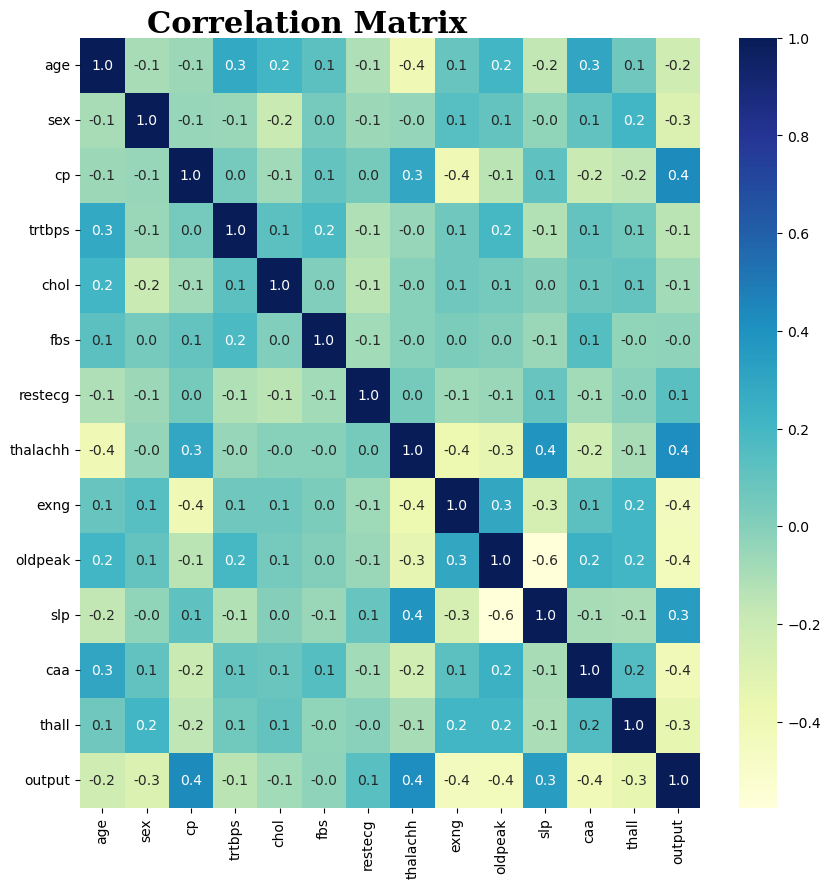

In [12]:

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [13]:
df_corr_output = df_corr.iloc[:,-1]
print("correlations between features and hear attach: ",df_corr_output)

correlations between features and hear attach:  age        -0.221476
sex        -0.283609
cp          0.432080
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalachh    0.419955
exng       -0.435601
oldpeak    -0.429146
slp         0.343940
caa        -0.408992
thall      -0.343101
output      1.000000
Name: output, dtype: float64


In [14]:
df_corr[['output']].transpose()

age       sex       cp    trtbps      chol       fbs   restecg  \
output -0.221476 -0.283609  0.43208 -0.146269 -0.081437 -0.026826  0.134874   

        thalachh      exng   oldpeak      slp       caa     thall  output  
output  0.419955 -0.435601 -0.429146  0.34394 -0.408992 -0.343101     1.0

<AxesSubplot:>

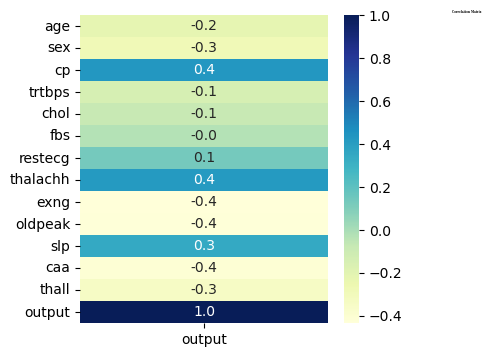

In [15]:
fig = plt.figure(figsize=(4,4))
# gs = fig.add_gridspec(1,1)
# gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
# mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=2, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr[['output']],fmt=".1f",annot=True,cmap='YlGnBu')

In [16]:
# x_pos = np.arange(len(df_corr_output.index[:-1]))
# labels = df_corr_output.index[:-1]
# # Build the plot
# fig, ax = plt.subplots(figsize=(12,5))

# ax.bar(x_pos, df_corr_output.values[:-1], align='center', alpha=0.8)
# ax.set_ylabel('correlation')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(labels)
# ax.set_title('correlations of features to heart attack')
# ax.yaxis.grid(True)
# # plt.grid()

# # Save the figure and show
# # plt.tight_layout()
# # plt.savefig('bar_plot.png')
# plt.show()

# preprocessing: preparing the data

In [22]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [42]:
# creating a copy of df
df1_copy = df

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
# df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
X = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]

# instantiating the scaler
# scaler = RobustScaler()
scaler = StandardScaler()

# scaling the continuous featuree
X = scaler.fit_transform(X)


In [62]:
#separate data for testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (241, 1)
The shape of y_test is        (61, 1)


In [44]:
y_train.squeeze(1).shape

(241,)

## Neural networks

In [59]:
# param_grid = [
#         {
#             'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#             'solver' : ['lbfgs', 'sgd', 'adam'],
#             'max_iter': [1000,2000],
#             'hidden_layer_sizes': [(10,),(30,),(100,),(200,),(5,5),(5,10),(10,20),(20,30),(30,40),(40,50),(100,100)],
#             'alpha': 10.0 ** -np.arange(1, 5),
#             'random_state':[102,7,88,91]
#         }
#        ]
# clf = GridSearchCV(MLPClassifier(), param_grid, cv=6, verbose = 1,
#                            scoring='accuracy',n_jobs=-1)
# # clf = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(50, ), random_state=102)
# clf.fit(X_train,y_train.squeeze(1))

# print("Best parameters set found on development set:")



In [60]:
# print(clf.best_params_)
# clf.best_score_

In [61]:
clf2 = MLPClassifier(solver='adam', learning_rate_init=1e-3,hidden_layer_sizes=(100,50 ),activation='relu', random_state=102,max_iter=500)
clf2.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Neural Net is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(clf2,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## SVM

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf'],
             'degree':[1,2,3,5,6],
              'random_state':[102,7,88,91]
             } 
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_svm.fit(X_train, y_train.squeeze(1))
print("Best parameters set found on development set:")
print(grid_svm.best_params_)

Fitting 6 folds for each of 1500 candidates, totalling 9000 fits
[CV 4/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=102;, score=0.850 total time=   0.0s
[CV 1/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=7;, score=0.878 total time=   0.0s
[CV 5/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=7;, score=0.850 total time=   0.0s
[CV 3/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=88;, score=0.800 total time=   0.0s
[CV 6/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=88;, score=0.875 total time=   0.0s
[CV 3/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=91;, score=0.800 total time=   0.0s
[CV 4/6] END C=0.1, degree=1, gamma=1, kernel=linear, random_state=91;, score=0.850 total time=   0.0s
[CV 5/6] END C=0.1, degree=1, gamma=1, kernel=poly, random_state=102;, score=0.850 total time=   0.0s
[CV 6/6] END C=0.1, degree=1, gamma=1, kernel=poly, random_state=102;, score=0.875 total time=   0.0s
[CV 5/6] EN

[CV 2/6] END C=0.1, degree=1, gamma=0.0001, kernel=rbf, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, score=0.800 total time=   0.0s
[CV 6/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, score=0.800 total time=   0.0s
[CV 1/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.854 total time=   0.0s
[CV 2/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.775 total time=   0.0s
[CV 3/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.725 total time=   0.0s
[CV 4/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.800 total time=   0.0s
[CV 5/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.800 total time=   0.0s
[CV 6/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=7;, score=0.800 total time=   0.0s
[CV 1/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=88;, score=0.854 

[CV 1/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.854 total time=   0.0s
[CV 2/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.700 total time=   0.0s
[CV 3/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.625 total time=   0.0s
[CV 4/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.800 total time=   0.0s
[CV 5/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.750 total time=   0.0s
[CV 6/6] END C=0.1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.750 total time=   0.0s
[CV 1/6] END C=0.1, degree=3, gamma=1, kernel=rbf, random_state=102;, score=0.537 total time=   0.0s
[CV 2/6] END C=0.1, degree=3, gamma=1, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 3/6] END C=0.1, degree=3, gamma=1, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 4/6] END C=0.1, degree=3, gamma=1, kernel=rbf, random_state=102;, score=0.550 total tim

[CV 1/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.537 total time=   0.0s
[CV 2/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 3/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 4/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 5/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.525 total time=   0.0s
[CV 6/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=102;, score=0.525 total time=   0.0s
[CV 1/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=7;, score=0.537 total time=   0.0s
[CV 2/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=7;, score=0.550 total time=   0.0s
[CV 3/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=7;, score=0.550 total time=   0.0s
[CV 4/6] END C=0.1, degree=5, gamma=0.01, kernel=rbf, random_state=7;,

[CV 4/6] END C=1, degree=1, gamma=0.001, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.001, kernel=poly, random_state=7;, score=0.525 total time=   0.0s
[CV 6/6] END C=1, degree=1, gamma=0.001, kernel=poly, random_state=7;, score=0.525 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=102;, score=0.525 total time=   0.0s
[CV 6/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=102;, score=0.525 total time=   0.0s
[CV 1/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=7;, score=0.537 total time=   0.0s
[CV 2/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.0001, kernel=poly, random_state=7;, 

[CV 2/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=102;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=102;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=102;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=102;, score=0.525 total time=   0.0s
[CV 6/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=102;, score=0.525 total time=   0.0s
[CV 1/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=7;, score=0.537 total time=   0.0s
[CV 2/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=7;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=2, gamma=0.01, kernel=poly, random_state=7;, score=0.525

[CV 1/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.756 total time=   0.0s
[CV 2/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.675 total time=   0.0s
[CV 3/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.650 total time=   0.0s
[CV 4/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.675 total time=   0.0s
[CV 5/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.650 total time=   0.0s
[CV 6/6] END C=0.1, degree=2, gamma=0.1, kernel=poly, random_state=91;, score=0.625 total time=   0.0s
[CV 1/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, score=0.854 total time=   0.0s
[CV 2/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, score=0.775 total time=   0.0s
[CV 3/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, score=0.725 total time=   0.0s
[CV 4/6] END C=0.1, degree=2, gamma=0.1, kernel=rbf, random_state=102;, s

[CV 2/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 3/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 4/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=102;, score=0.550 total time=   0.0s
[CV 5/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=102;, score=0.525 total time=   0.0s
[CV 6/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=102;, score=0.525 total time=   0.0s
[CV 1/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=7;, score=0.537 total time=   0.0s
[CV 2/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=7;, score=0.550 total time=   0.0s
[CV 3/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=7;, score=0.550 total time=   0.0s
[CV 4/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf, random_state=7;, score=0.550 total time=   0.0s
[CV 5/6] END C=0.1, degree=6, gamma=0.0001, kernel=rbf

[CV 1/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.561 total time=   0.0s
[CV 2/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.650 total time=   0.0s
[CV 3/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.625 total time=   0.0s
[CV 4/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.600 total time=   0.0s
[CV 5/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.625 total time=   0.0s
[CV 6/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=102;, score=0.550 total time=   0.0s
[CV 1/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=7;, score=0.561 total time=   0.0s
[CV 2/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=7;, score=0.650 total time=   0.0s
[CV 3/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=7;, score=0.625 total time=   0.0s
[CV 4/6] END C=0.1, degree=5, gamma=0.1, kernel=poly, random_state=7;,

[CV 4/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=7;, score=0.800 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=7;, score=0.825 total time=   0.0s
[CV 6/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=7;, score=0.825 total time=   0.0s
[CV 1/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.854 total time=   0.0s
[CV 2/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.800 total time=   0.0s
[CV 4/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.800 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.825 total time=   0.0s
[CV 6/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=88;, score=0.825 total time=   0.0s
[CV 1/6] END C=1, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.854 to

[CV 1/6] END C=1, degree=1, gamma=0.001, kernel=linear, random_state=102;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=1, gamma=0.001, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=1, gamma=0.001, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=1, gamma=0.001, kernel=linear, random_state=102;, score=0.850 total time=   0.0s
[CV 1/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_state=88;, score=0.537 total time=   0.0s
[CV 2/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_state=88;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_state=88;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_state=88;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_state=88;, score=0.525 total time=   0.0s
[CV 6/6] END C=1, degree=1, gamma=0.0001, kernel=rbf, random_

[CV 2/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=102;, score=0.850 total time=   0.0s
[CV 5/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=102;, score=0.800 total time=   0.0s
[CV 6/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=102;, score=0.875 total time=   0.0s
[CV 1/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=7;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=7;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=7;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=5, gamma=0.001, kernel=linear, random_state=7;, score=0.850 total time=   0.0s
[CV 5/6] END C=1, degree=5, gamma=0.001, kernel=linear

[CV 6/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=7;, score=0.850 total time=   0.0s
[CV 1/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.854 total time=   0.0s
[CV 2/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.750 total time=   0.0s
[CV 3/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.800 total time=   0.0s
[CV 4/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 5/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 6/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.850 total time=   0.0s
[CV 1/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.854 total time=   0.0s
[CV 2/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.750 total time=   0.0s
[CV 3/6] END C=1, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.800 total time=   0.0s
[

[CV 4/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=7;, score=0.850 total time=   0.0s[CV 3/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=102;, score=0.850 total time=   0.0s
[CV 5/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=102;, score=0.800 total time=   0.0s
[CV 6/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=102;, score=0.875 total time=   0.0s
[CV 1/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=7;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=7;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=7;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=7;, score=0.850 total time=   0.0s
[CV 5/6] END C=1, degree=3, gamma=1, kernel=linear, random_state=7;, score=0.800 total t

[CV 2/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.525 total time=   0.0s
[CV 6/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.525 total time=   0.0s
[CV 1/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.537 total time=   0.0s
[CV 2/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 3/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 4/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END C=1, degree=2, gamma=0.0001, kernel=poly, random_st

[CV 1/6] END C=10, degree=1, gamma=0.01, kernel=rbf, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=10, degree=1, gamma=0.01, kernel=rbf, random_state=91;, score=0.775 total time=   0.0s
[CV 1/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.854 total time=   0.0s
[CV 2/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.775 total time=   0.0s
[CV 3/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 4/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 5/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 6/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=88;, score=0.850 total time=   0.0s
[CV 1/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=91;, score=0.854 total time=   0.0s
[CV 2/6] END C=10, degree=1, gamma=0.001, kernel=rbf, random_state=91;, sco

[CV 6/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=7;, score=0.775 total time=   0.0s
[CV 1/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.700 total time=   0.0s
[CV 3/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.625 total time=   0.0s
[CV 4/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.750 total time=   0.0s
[CV 5/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.675 total time=   0.0s
[CV 6/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.775 total time=   0.0s
[CV 1/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.700 total time=   0.0s
[CV 1/6] END C=1, degree=3, gamma=0.1, kernel=poly, random_state=88;, score=0.854 total time=   0.0s
[CV 2/6] 


[CV 5/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=7;, score=0.800 total time=   0.0s
[CV 6/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=7;, score=0.875 total time=   0.0s
[CV 1/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.775 total time=   0.0s
[CV 3/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.775 total time=   0.0s
[CV 4/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.850 total time=   0.0s
[CV 5/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.800 total time=   0.0s
[CV 6/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=88;, score=0.875 total time=   0.0s
[CV 1/6] END C=1, degree=6, gamma=0.0001, kernel=linear, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=1, degree=6, gamma=0.0001, kerne

[CV 2/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=88;, score=0.675 total time=   0.0s
[CV 3/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=88;, score=0.750 total time=   0.0s
[CV 4/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=88;, score=0.850 total time=   0.0s
[CV 5/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=88;, score=0.725 total time=   0.0s
[CV 6/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 1/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=91;, score=0.732 total time=   0.0s
[CV 2/6] END C=10, degree=3, gamma=1, kernel=rbf, random_state=91;, score=0.675 total time=   0.0s
[CV 3/6] END C=10, degree=3, gamma=0.01, kernel=linear, random_state=91;, score=0.775 total time=   0.0s
[CV 4/6] END C=10, degree=3, gamma=0.01, kernel=linear, random_state=91;, score=0.850 total time=   0.0s
[CV 5/6] END C=10, degree=3, gamma=0.01, kernel=linear, random_state=91;, score=0.825 total time=

[CV 5/6] END C=100, degree=1, gamma=0.1, kernel=linear, random_state=91;, score=0.800 total time=   0.0s
[CV 6/6] END C=100, degree=1, gamma=0.1, kernel=linear, random_state=91;, score=0.875 total time=   0.0s
[CV 1/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.854 total time=   0.0s
[CV 2/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.750 total time=   0.0s
[CV 3/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.850 total time=   0.0s
[CV 5/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.825 total time=   0.0s
[CV 6/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=102;, score=0.875 total time=   0.0s
[CV 1/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_state=7;, score=0.854 total time=   0.0s
[CV 2/6] END C=100, degree=1, gamma=0.1, kernel=poly, random_sta

[CV 5/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=88;, score=0.550 total time=   0.0s
[CV 6/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=88;, score=0.575 total time=   0.0s
[CV 1/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.537 total time=   0.0s
[CV 2/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.575 total time=   0.0s
[CV 3/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.600 total time=   0.0s
[CV 4/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.550 total time=   0.0s
[CV 6/6] END C=10, degree=6, gamma=0.0001, kernel=rbf, random_state=91;, score=0.575 total time=   0.0s
[CV 1/6] END C=100, degree=1, gamma=1, kernel=linear, random_state=102;, score=0.854 total time=   0.1s
[CV 2/6] END C=100, degree=1, gamma=1, kernel=linear, random_sta

[CV 1/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.878 total time=   0.0s
[CV 2/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.700 total time=   0.0s
[CV 3/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.625 total time=   0.0s
[CV 4/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.750 total time=   0.0s
[CV 5/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.675 total time=   0.0s
[CV 6/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=88;, score=0.775 total time=   0.0s
[CV 1/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.700 total time=   0.0s
[CV 3/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.625 total time=   0.0s
[CV 4/6] END C=100, degree=3, gamma=1, kernel=poly, random_state=91;, score=0.750 total tim

[CV 1/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.775 total time=   0.0s
[CV 3/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.775 total time=   0.0s
[CV 4/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.850 total time=   0.0s
[CV 5/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.800 total time=   0.0s
[CV 6/6] END C=100, degree=1, gamma=0.01, kernel=poly, random_state=91;, score=0.875 total time=   0.0s
[CV 1/6] END C=100, degree=1, gamma=0.01, kernel=rbf, random_state=102;, score=0.854 total time=   0.0s
[CV 2/6] END C=100, degree=1, gamma=0.01, kernel=rbf, random_state=102;, score=0.750 total time=   0.0s
[CV 3/6] END C=100, degree=1, gamma=0.01, kernel=rbf, random_state=102;, score=0.750 total time=   0.0s
[CV 4/6] END C=100, degree=1, gamma=0.01, kernel=rbf, random_sta

[CV 2/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 3/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 4/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.550 total time=   0.0s
[CV 5/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.525 total time=   0.0s
[CV 6/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=88;, score=0.525 total time=   0.0s
[CV 1/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.537 total time=   0.0s
[CV 2/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 3/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 4/6] END C=100, degree=2, gamma=0.0001, kernel=poly, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END C=100, degree=2, gamma=0.0001, ke

[CV 1/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.854 total time=   0.0s
[CV 2/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.750 total time=   0.0s
[CV 3/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.750 total time=   0.0s
[CV 4/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.725 total time=   0.0s
[CV 5/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.700 total time=   0.0s
[CV 6/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 1/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.854 total time=   0.0s
[CV 2/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.750 total time=   0.0s
[CV 3/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.750 total time=   0.0s
[CV 4/6] END C=10, degree=6, gamma=0.1, kernel=rbf, random_state=91;, score=0.725 total tim

Best parameters set found on development set:
{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'linear', 'random_state': 102}


In [48]:
grid_svm.best_score_

0.8380081300813008

The test accuracy score of SVM is  0.8524590163934426
number of patients that had heart attach cases in the test dataset:  34
number of patients that didn't had  cases in the test dataset:  27
[0.83606557 0.90163934 0.78333333 0.71666667 0.78333333]


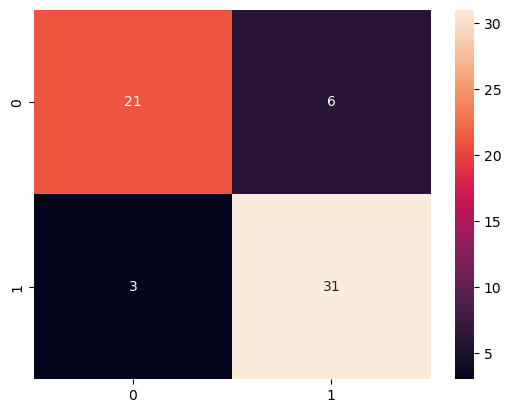

In [227]:
svm =SVC(kernel="poly",random_state=102)
svm.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = svm.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(svm,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

##  Decision Tree

In [49]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(2,20,2),
              'criterion' :['gini', 'entropy'],
              'random_state':[102,7,88,91]
             } 
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_dt.fit(X_train, y_train)

Fitting 6 folds for each of 648 candidates, totalling 3888 fits


/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

[CV 5/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=88;, score=0.825 total time=   0.0s
[CV 6/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=88;, score=0.900 total time=   0.0s
[CV 1/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.878 total time=   0.0s
[CV 2/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.775 total time=   0.0s
[CV 3/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.800 total time=   0.0s
[CV 4/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.825 total time=   0.0s
[CV 5/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.825 total time=   0.0s
[CV 6/6] END C=100, degree=5, gamma=0.001, kernel=rbf, random_state=91;, score=0.900 total time=   0.0s
[CV 1/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=102;, score=0.854 total time=   0.1s
[CV 2/6] END C=100, degree=5, gamma=0.0001, kernel=linear, 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

random_state=102;, score=0.750 total time=   0.1s
[CV 3/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=102;, score=0.850 total time=   0.1s
[CV 5/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=102;, score=0.800 total time=   0.0s
[CV 6/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=102;, score=0.875 total time=   0.0s
[CV 1/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=7;, score=0.854 total time=   0.1s
[CV 2/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=7;, score=0.750 total time=   0.1s
[CV 3/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=7;, score=0.775 total time=   0.0s
[CV 4/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=7;, score=0.850 total time=   0.1s
[CV 5/6] END C=100, degree=5, gamma=0.0001, kernel=linear, random_state=7;, score=0.80

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

[CV 1/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.854 total time=   0.7s
[CV 2/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.750 total time=   0.7s
[CV 3/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.775 total time=   0.3s
[CV 4/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.850 total time=   0.5s
[CV 5/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.800 total time=   0.6s
[CV 6/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=88;, score=0.875 total time=   0.6s
[CV 1/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=91;, score=0.854 total time=   1.5s
[CV 2/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=91;, score=0.750 total time=   0.7s
[CV 3/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=91;, score=0.775 total time=   0.3s
[CV 4/6] END C=1000, degree=1, gamma=1, kernel=poly, random_state=91;, score=0.850

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

 END C=1000, degree=3, gamma=1, kernel=rbf, random_state=91;, score=0.725 total time=   0.0s
[CV 6/6] END C=1000, degree=3, gamma=1, kernel=rbf, random_state=91;, score=0.825 total time=   0.0s
[CV 3/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.775 total time=   0.3s
[CV 4/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.850 total time=   0.5s
[CV 5/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.800 total time=   0.5s
[CV 6/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.875 total time=   0.4s
[CV 5/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=88;, score=0.800 total time=   0.6s
[CV 6/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=88;, score=0.875 total time=   0.4s
[CV 1/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=91;, score=0.854 total time=   0.6s
[CV 2/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_stat

[CV 6/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto, random_state=7;, score=0.825 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto, random_state=88;, score=0.537 total time=   0.0s
[CV 2/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto, random_state=88;, score=0.650 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto, random_state=88;, score=0.700 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=auto, random_state=88;, score=0.650 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=7;, score=0.775 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=7;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=7;, score=0.750 total time=   0.0s
[CV 

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

[CV 1/6] END C=1000, degree=3, gamma=0.001, kernel=linear, random_state=7;, score=0.854 total time=   0.6s
[CV 2/6] END C=1000, degree=3, gamma=0.001, kernel=linear, random_state=7;, score=0.750 total time=   0.7s
[CV 1/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=102;, score=0.878 total time=   0.0s
[CV 2/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=102;, score=0.775 total time=   0.0s
[CV 3/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=102;, score=0.775 total time=   0.0s
[CV 5/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=102;, score=0.825 total time=   0.0s
[CV 1/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=7;, score=0.878 total time=   0.0s
[CV 3/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=7;, score=0.775 total time=   0.0s
[CV 5/6] END C=1000, degree=3, gamma=0.001, kernel=rbf, random_state=7;, score=0.825 total time=   0.0s
[CV 1/6] END C=1000, degree=3, gamma=0.001, kernel

arning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/mini

, max_depth=4, max_features=sqrt, random_state=88;, score=0.525 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.537 total time=   0.0s
[CV 2/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.550 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.550 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.525 total time=   0.0s
[CV 6/6] END ccp_alpha=0.1, criterion=gini, max_depth=4, max_features=sqrt, random_state=91;, score=0.525 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=gini, max_depth=6, max_features=sqrt, random_state=102;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.1, criterion=gin

 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: Fu

 total time=   0.0s
[CV 6/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=auto, random_state=91;, score=0.525 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.700 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=sqrt, random_state=102;, score=0.825 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_featur

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

ore=0.800 total time=   0.0s
[CV 6/6] END C=1000, degree=3, gamma=1, kernel=linear, random_state=91;, score=0.875 total time=   0.4s
[CV 5/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=102;, score=0.800 total time=   0.5s
[CV 6/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=102;, score=0.875 total time=   0.4s
[CV 1/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.854 total time=   0.6s
[CV 2/6] END C=1000, degree=3, gamma=0.1, kernel=linear, random_state=7;, score=0.750 total time=   0.7s
[CV 1/6] END C=1000, degree=3, gamma=0.1, kernel=rbf, random_state=102;, score=0.805 total time=   0.0s
[CV 2/6] END C=1000, degree=3, gamma=0.1, kernel=rbf, random_state=102;, score=0.650 total time=   0.0s
[CV 3/6] END C=1000, degree=3, gamma=0.1, kernel=rbf, random_state=102;, score=0.675 total time=   0.0s
[CV 4/6] END C=1000, degree=3, gamma=0.1, kernel=rbf, random_state=102;, score=0.775 total time=   0.0s
[CV 5/6] END C=1000, degree

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

iterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.780 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.675 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.800 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.700 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=sqrt, random_state=91;, score=0.750 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt, random_state=102;, score=0.805 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=gini, max_depth=10, max_features=sqrt, random_state=102;, score=0.725 total time=   0.0s
[CV 3/6] END ccp_al

[CV 6/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=88;, score=0.800 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.537 total time=   0.0s
[CV 2/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.550 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.550 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.525 total time=   0.0s
[CV 6/6] END ccp_alpha=0.1, criterion=entropy, max_depth=10, max_features=log2, random_state=91;, score=0.525 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=entropy, max_depth=12, max_features=auto, random_state=102;

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

[CV 4/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=sqrt, random_state=91;, score=0.550 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=sqrt, random_state=91;, score=0.525 total time=   0.0s
[CV 6/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=sqrt, random_state=91;, score=0.525 total time=   0.0s
[CV 1/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, random_state=102;, score=0.756 total time=   0.1s
[CV 2/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, random_state=102;, score=0.700 total time=   0.0s
[CV 3/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, random_state=102;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=log2, random_state=102;, score=0.750 total 

arning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/mini

=0.775 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=88;, score=0.805 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=88;, score=0.625 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=88;, score=0.825 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=88;, score=0.800 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=sqrt, random_state=88;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=sqrt, random_state=88;, score=0.800 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_features=sqrt, random_state=91;, score=0.780 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=entropy, max_depth=8, max_featur

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

[CV 5/6] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=sqrt, random_state=102;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=sqrt, random_state=102;, score=0.750 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=sqrt, random_state=7;, score=0.878 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=gini, max_depth=4, max_features=sqrt, random_state=7;, score=0.675 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, random_state=102;, score=0.780 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, random_state=102;, score=0.725 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, random_state=102;, score=0.750 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=gini, max_depth=6, max_features=sqrt, random_state=102;, score=0.850 total t

conda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past b

pha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=88;, score=0.775 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.780 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.725 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.775 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=auto, random_state=91;, score=0.725 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=6, max_features=sqrt, random_state=102;, score=0.732 total

[CV 2/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=102;, score=0.750 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=102;, score=0.675 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=102;, score=0.775 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=102;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=102;, score=0.850 total time=   0.0s
[CV 1/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=7;, score=0.732 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=7;, score=0.650 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=gini, max_depth=16, max_features=log2, random_state=7;, score

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [102, 7, 88, 91]},
             scoring='accuracy', verbose=3)

qrt, random_state=102;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=102;, score=0.700 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=102;, score=0.775 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=102;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=102;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=102;, score=0.800 total time=   0.0s
[CV 1/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, cr

In [50]:
print("Best parameters set found on development set:")
print(grid_dt.best_params_)
print(grid_dt.best_score_)

Best parameters set found on development set:
{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'random_state': 88}
0.8090447154471545


The train accuracy score of DT is  0.8755186721991701
The test accuracy score of DT is  0.7704918032786885
[0.72131148 0.81967213 0.68333333 0.73333333 0.8       ]


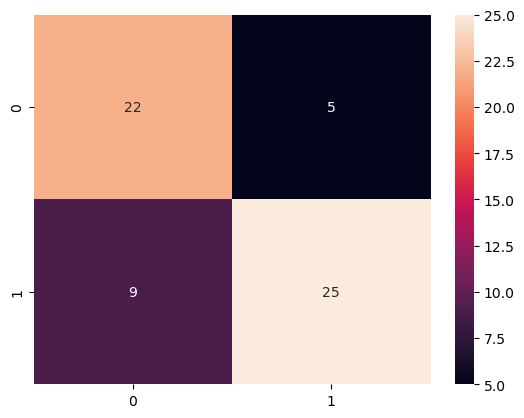

In [22]:

dt =DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=102)
dt.fit(X_train,y_train)


# predicting the values
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
cv_result = cross_val_score(dt,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

## Boosing

In [51]:
param_grid = {'learning_rate': [0.1,0.5,1.0,3.0,10.0],
              'n_estimators': [5, 10, 15,20,35,50,100],
              'random_state':[102,7,88,91]
             } 
grid_boosting = GridSearchCV( AdaBoostClassifier(), param_grid, refit = True, verbose = 3,cv=5,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_boosting.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(grid_boosting.best_params_)

iterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.800 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=7;, score=0.750 total time=   0.0s
[CV 1/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=88;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=88;, score=0.650 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=88;, score=0.700 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=entropy, max_depth=2, max_features=sqrt, random_state=88;, score=0.650 total time=   0

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

[CV 6/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=7;, score=0.800 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.829 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.850 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.825 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=88;, score=0.850 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=gini, max_depth=14, max_features=auto, random_state=91;, score=0.780 tota

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

[CV 5/6] END ccp_alpha=0.01, criterion=gini, max_depth=18, max_features=log2, random_state=91;, score=0.675 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=gini, max_depth=18, max_features=log2, random_state=91;, score=0.775 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102;, score=0.707 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102;, score=0.800 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102;, score=0.800 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=entropy, max_depth=4, max_features=sqrt, random_state=102

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

iterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.780 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.650 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.675 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.750 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.700 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=10, max_features=sqrt, random_state=91;, score=0.775 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=12, max_features=sqrt, random_state=88;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=12, max_features=sqrt, random_state=88;, score=0.800 tot

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-v

Best parameters set found on development set:
{'learning_rate': 0.1, 'n_estimators': 35, 'random_state': 102}


/Users/labuser/miniconda3/envs/ml_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
grid_boosting.best_score_

0.8380952380952381

The train accuracy score of DT is  0.8713692946058091
The test accuracy score of DT is  0.7868852459016393
[0.85245902 0.85245902 0.83333333 0.76666667 0.76666667]


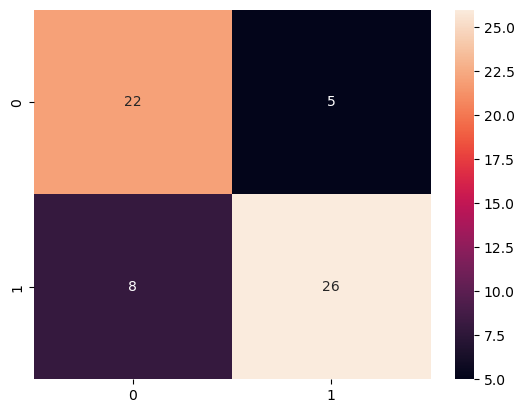

In [225]:
adabost = AdaBoostClassifier(n_estimators=20, random_state=102)

adabost.fit(X_train,y_train.squeeze(1))


# predicting the values
y_pred = adabost.predict(X_test)
y_pred_train = adabost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(adabost,X,y.squeeze(1)) # uses R^2 as score 
print(cv_result)

The train accuracy score of DT is  0.995850622406639
The test accuracy score of DT is  0.819672131147541
[0.80327869 0.83606557 0.78333333 0.78333333 0.73333333]


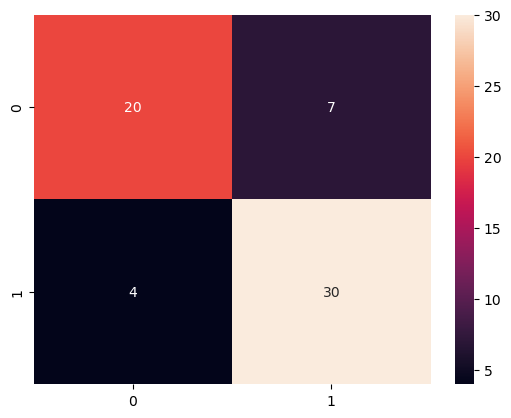

In [53]:
grad_boost = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, 
                                        max_depth=5, random_state=102).fit(X_train, y_train.squeeze(1))


# predicting the values
y_pred = grad_boost.predict(X_test)
y_pred_train = grad_boost.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(grad_boost,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)

## KNN

In [54]:
param_grid = {'n_neighbors': np.arange(1,20),
              'weights': ['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[5,10,15,20,30,50,100]
             } 
grid_knn = GridSearchCV( KNeighborsClassifier(), param_grid, refit = True, verbose = 3,cv=6,
                           scoring='accuracy',n_jobs=-1)
  
# fitting the model for grid search
grid_knn.fit(X_train, y_train.squeeze(1))
print("Best parameters set found on development set:")
print(grid_knn.best_params_)

Fitting 6 folds for each of 1064 candidates, totalling 6384 fits
[CV 5/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=7;, score=0.725 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=7;, score=0.750 total time=   0.0s
[CV 1/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=88;, score=0.756 total time=   0.0s
[CV 2/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=88;, score=0.675 total time=   0.0s
[CV 3/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=88;, score=0.750 total time=   0.0s
[CV 4/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=88;, score=0.850 total time=   0.0s
[CV 5/6] END ccp_alpha=0.01, criterion=entropy, max_depth=12, max_features=auto, random_state=88;, score=0.750 total time=   0.0s
[CV 6/6] END ccp_alpha=0.01

[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=88;, score=0.825 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=88;, score=0.800 total time=   0.0s
[CV 1/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=91;, score=0.732 total time=   0.0s
[CV 2/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=91;, score=0.750 total time=   0.0s
[CV 3/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=91;, score=0.625 total time=   0.0s
[CV 4/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=91;, score=0.825 total time=   0.0s
[CV 5/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_state=91;, score=0.700 total time=   0.0s
[CV 6/6] END ccp_alpha=0.001, criterion=entropy, max_depth=4, max_features=log2, random_st

[CV 1/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.775 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=distance;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=15, n_neighbors=15, weights=distance;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=20, n_neighbors=4, weights=distance;, score=0.875 total time=   0.0s
[CV 4/6] END algorithm=aut

[CV 5/6] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=uniform;, score=0.775 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=uniform;, score=0.825 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance;, score=0.878 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=5, n_neighbors=7, weights=distance;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=5, n_neighbors=9, weights=distance;, score=0.875 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=5, n_neighbors=9, weights=distance;, score=0.825 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=5, n_neighbors=9, weights=distance;, score=0.800 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=5, n_neighbors=9, weights=distance;, score=0.800 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=5, n_neighbors=10, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=

[CV 2/5] END learning_rate=0.5, n_estimators=15, random_state=102;, score=0.771 total time=   0.0s
[CV 3/5] END learning_rate=0.5, n_estimators=15, random_state=102;, score=0.833 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=15, random_state=102;, score=0.917 total time=   0.1s
[CV 2/5] END learning_rate=0.5, n_estimators=15, random_state=91;, score=0.771 total time=   0.1s
[CV 3/5] END learning_rate=0.5, n_estimators=15, random_state=91;, score=0.833 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=15, random_state=91;, score=0.917 total time=   0.1s
[CV 5/5] END learning_rate=0.5, n_estimators=15, random_state=91;, score=0.708 total time=   0.1s
[CV 4/5] END learning_rate=0.5, n_estimators=20, random_state=7;, score=0.917 total time=   0.1s
[CV 5/5] END learning_rate=0.5, n_estimators=20, random_state=7;, score=0.688 total time=   0.1s
[CV 1/5] END learning_rate=0.5, n_estimators=20, random_state=88;, score=0.816 total time=   0.1s
[CV 2/5] END learni

[CV 1/5] END learning_rate=10.0, n_estimators=100, random_state=91;, score=0.245 total time=   0.3s
[CV 4/6] END algorithm=auto, leaf_size=5, n_neighbors=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=5, n_neighbors=2, weights=distance;, score=0.750 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=5, n_neighbors=2, weights=distance;, score=0.875 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=5, n_neighbors=4, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=5, n_neighbors=4, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=5, n_neighbors=4, weights=uniform;, score=0.825 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=5, n_neighbors=4, weights=uniform;, score=0.825 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=5, n_neighbors=5, weights=uniform;, score=0.725 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=5, n_neighb

[CV 3/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=uniform;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=distance;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=distance;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=distance;, score=0.850 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=distance;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=50, n_neighbors=11, weights=distance;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=

[CV 3/6] END algorithm=auto, leaf_size=100, n_neighbors=10, weights=distance;, score=0.900 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=100, n_neighbors=10, weights=distance;, score=0.800 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=100, n_neighbors=10, weights=distance;, score=0.800 total time=   0.0s
[CV 6/6] END algorithm=auto, leaf_size=100, n_neighbors=10, weights=distance;, score=0.825 total time=   0.0s
[CV 1/6] END algorithm=auto, leaf_size=100, n_neighbors=11, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=auto, leaf_size=100, n_neighbors=11, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=auto, leaf_size=100, n_neighbors=11, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/6] END algorithm=auto, leaf_size=100, n_neighbors=11, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=auto, leaf_size=100, n_neighbors=11, weights=uniform;, score=0.825 total time=   0.0s
[CV 6/6] END al

[CV 3/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=12, weights=distance;, score=0.850 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=12, weights=distance;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=12, weights=distance;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=12, weights=distance;, score=0.825 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=13, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=13, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=13, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=13, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=10, n_neighbors=13, weights=uniform;, score=0.82

[CV 4/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=uniform;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.850 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=11, weights=distance;, score=0.800 total time=   

[CV 6/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, weights=distance;, score=0.850 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.878 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.775 total time=   0.0s
[CV 5/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.775 total time=   0.0s
[CV 6/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=uniform;, score=0.825 total time=   0.0s
[CV 1/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=distance;, score=0.878 total time=   0.0s
[CV 2/6] END algorithm=ball_tree, leaf_size=20, n_neighbors=7, weights=distance;, score=0.750 total ti

[CV 4/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=3, weights=distance;, score=0.825 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=3, weights=distance;, score=0.775 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=3, weights=distance;, score=0.850 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.825 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.825 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.750 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/6

[CV 2/6] END algorithm=kd_tree, leaf_size=10, n_neighbors=13, weights=distance;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=10, n_neighbors=13, weights=distance;, score=0.800 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=10, n_neighbors=13, weights=distance;, score=0.750 total time=   0.0s
[CV 5/6] END algorithm=kd_tree, leaf_size=10, n_neighbors=13, weights=distance;, score=0.825 total time=   0.0s
[CV 6/6] END algorithm=kd_tree, leaf_size=10, n_neighbors=13, weights=distance;, score=0.825 total time=   0.0s
[CV 1/6] END algorithm=kd_tree, leaf_size=15, n_neighbors=3, weights=uniform;, score=0.902 total time=   0.0s
[CV 2/6] END algorithm=kd_tree, leaf_size=15, n_neighbors=3, weights=uniform;, score=0.725 total time=   0.0s
[CV 3/6] END algorithm=kd_tree, leaf_size=15, n_neighbors=3, weights=uniform;, score=0.875 total time=   0.0s
[CV 4/6] END algorithm=kd_tree, leaf_size=15, n_neighbors=3, weights=uniform;, score=0.825 total time=   0.0s


[CV 4/6] END algorithm=brute, leaf_size=15, n_neighbors=9, weights=distance;, score=0.825 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=15, n_neighbors=9, weights=distance;, score=0.800 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=15, n_neighbors=9, weights=distance;, score=0.800 total time=   0.0s
[CV 1/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.854 total time=   0.0s
[CV 2/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.750 total time=   0.0s
[CV 3/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.0s
[CV 4/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.775 total time=   0.0s
[CV 5/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.775 total time=   0.0s
[CV 6/6] END algorithm=brute, leaf_size=15, n_neighbors=10, weights=uniform;, score=0.825 total time=   0.0s
[CV 1/6] END algori

In [56]:
grid_knn.best_score_

0.8295731707317073

The train accuracy score of DT is  0.8630705394190872
The test accuracy score of DT is  0.7540983606557377
[0.83606557 0.8852459  0.8        0.81666667 0.75      ]


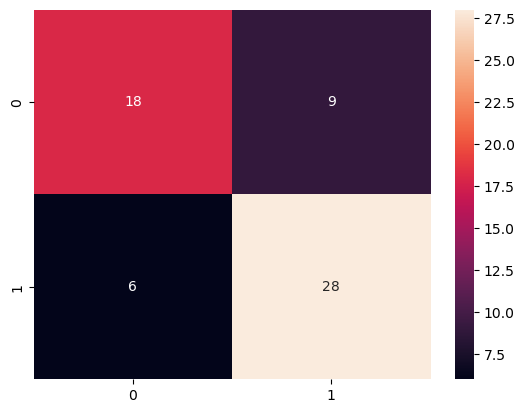

In [237]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.squeeze(1))
# predicting the values
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
# printing the test accuracy
print("The train accuracy score of DT is ", accuracy_score(y_train, y_pred_train))
print("The test accuracy score of DT is ", accuracy_score(y_test, y_pred))

# print("number of patients that had heart attach cases in the test dataset: ",len(np.where(y_test==1)[0]))
# print("number of patients that didn't had  cases in the test dataset: ",len(np.where(y_test==0)[0]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

cv_result = cross_val_score(knn,X,y.squeeze(1),cv=5) # uses R^2 as score 
print(cv_result)